In [ ]:
import pandas as pd
import numpy as np
import json
import nltk
import re
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

%matplotlib inline
pd.set_option('display.max_colwidth', 300)

In [ ]:
import pandas as pd
meta = pd.read_csv("movie.metadata.tsv", sep = '\t', header = None)
print(meta.head())

          0           1  \
0    975900   /m/03vyhn   
1   3196793   /m/08yl5d   
2  28463795  /m/0crgdbh   
3   9363483  /m/0285_cd   
4    261236   /m/01mrr1   

                                                       2           3  \
0                                         Ghosts of Mars  2001-08-24   
1  Getting Away with Murder: The JonBenét Ramsey Mystery  2000-02-16   
2                                            Brun bitter        1988   
3                                       White Of The Eye        1987   
4                                      A Woman in Flames        1983   

            4      5                                   6  \
0  14010832.0   98.0  {"/m/02h40lc": "English Language"}   
1         NaN   95.0  {"/m/02h40lc": "English Language"}   
2         NaN   83.0  {"/m/05f_3": "Norwegian Language"}   
3         NaN  110.0  {"/m/02h40lc": "English Language"}   
4         NaN  106.0   {"/m/04306rv": "German Language"}   

                                           

In [ ]:
data.head()


975900   /m/03vyhn  \
0   3196793   /m/08yl5d   
1  28463795  /m/0crgdbh   
2   9363483  /m/0285_cd   
3    261236   /m/01mrr1   
4  13696889  /m/03cfc81   

                                          Ghosts of Mars  2001-08-24  \
0  Getting Away with Murder: The JonBenét Ramsey Mystery  2000-02-16   
1                                            Brun bitter        1988   
2                                       White Of The Eye        1987   
3                                      A Woman in Flames        1983   
4                                          The Gangsters  1913-05-29   

   14010832   98.0  \
0       NaN   95.0   
1       NaN   83.0   
2       NaN  110.0   
3       NaN  106.0   
4       NaN   35.0   

                              {"/m/02h40lc": "English Language"}  \
0                             {"/m/02h40lc": "English Language"}   
1                             {"/m/05f_3": "Norwegian Language"}   
2                             {"/m/02h40lc": "English Language"}   
3                              {"/m/04306rv": "German Language"}   
4  {"/m/06ppq": "Silent film", "/m/02h40lc": "English Language"}   

   {"/m/09c7w0": "United States of America"}  \
0  {"/m/09c7w0": "United States of America"}   
1                     {"/m/05b4w": "Norway"}   
2             {"/m/07ssc": "United Kingdom"}   
3                    {"/m/0345h": "Germany"}   
4  {"/m/09c7w0": "United States of America"}   

  {"/m/01jfsb": "Thriller", "/m/06n90": "Science Fiction", "/m/03npn": "Horror", "/m/03k9fj": "Adventure", "/m/0fdjb": "Supernatural", "/m/02kdv5l": "Action", "/m/09zvmj": "Space western"}  
0                                                                             {"/m/02n4kr": "Mystery", "/m/03bxz7": "Biographical film", "/m/07s9rl0": "Drama", "/m/0hj3n01": "Crime Drama"}  
1                                                                                                                                       {"/m/0lsxr": "Crime Fiction", "/m/07s9rl0": "Drama"}  
2                                                                                           {"/m/01jfsb": "Thriller", "/m/0glj9q": "Erotic thriller", "/m/09blyk": "Psychological thriller"}  
3                                                                                                                                                                    {"/m/07s9rl0": "Drama"}  
4                                                         {"/m/02hmvc": "Short Film", "/m/06ppq": "Silent film", "/m/0219x_": "Indie", "/m/01g6gs": "Black-and-white", "/m/01z4y": "Comedy"}

In [ ]:
meta.columns = ["movie_id",1,"movie_name",3,4,5,6,7,"genre"]

In [ ]:
plots = []

with open("plot_summaries.txt", 'r') as f:
       reader = csv.reader(f, dialect='excel-tab')
       for row in tqdm(reader):
            plots.append(row)

25543it [00:00, 45937.89it/s]


In [ ]:
movie_id = []
plot = []

# extract movie Ids and plot summaries
for i in tqdm(plots):
  movie_id.append(i[0])
  plot.append(i[1])

# create dataframe
movies = pd.DataFrame({'movie_id': movie_id, 'plot': plot})


100%|██████████| 25543/25543 [00:00<00:00, 994062.70it/s]


In [ ]:
movies.head()

movie_id  \
0  23890098   
1  31186339   
2  20663735   
3   2231378   
4    595909   

                                                                                                                                                                                                                                                                                                          plot  
0                                                                                                                           Shlykov, a hard-working taxi driver and Lyosha, a saxophonist, develop a bizarre love-hate relationship, and despite their prejudices, realize they aren't so different after all.  
1  The nation of Panem consists of a wealthy Capitol and twelve poorer districts. As punishment for a past rebellion, each district must provide a boy and girl  between the ages of 12 and 18 selected by lottery  for the annual Hunger Games. The tributes must fight to the death in an arena; the sole...  
2  Poovalli Induchoodan  is sentenced for six years prison life for murdering his classmate. Induchoodan, the only son of Justice Maranchery Karunakara Menon  was framed in the case by Manapally Madhavan Nambiar  and his crony DYSP Sankaranarayanan  to take revenge on idealist judge Menon who had e...  
3  The Lemon Drop Kid , a New York City swindler, is illegally touting horses at a Florida racetrack. After several successful hustles, the Kid comes across a beautiful, but gullible, woman intending to bet a lot of money. The Kid convinces her to switch her bet, employing a prefabricated con. Unfo...  
4  Seventh-day Adventist Church pastor Michael Chamberlain, his wife Lindy, their two sons, and their nine-week-old daughter Azaria are on a camping holiday in the Outback. With the baby sleeping in their tent, the family is enjoying a barbecue with their fellow campers when a cry is heard. Lindy r...

In [ ]:
# change datatype of 'movie_id'
meta['movie_id'] = meta['movie_id'].astype(str)

# merge meta with movies
movies = pd.merge(movies, meta[['movie_id', 'movie_name', 'genre']], on = 'movie_id')

movies.head()

movie_id  \
0  23890098   
1  31186339   
2  20663735   
3   2231378   
4    595909   

                                                                                                                                                                                                                                                                                                          plot  \
0                                                                                                                           Shlykov, a hard-working taxi driver and Lyosha, a saxophonist, develop a bizarre love-hate relationship, and despite their prejudices, realize they aren't so different after all.   
1  The nation of Panem consists of a wealthy Capitol and twelve poorer districts. As punishment for a past rebellion, each district must provide a boy and girl  between the ages of 12 and 18 selected by lottery  for the annual Hunger Games. The tributes must fight to the death in an arena; the sole...   
2  Poovalli Induchoodan  is sentenced for six years prison life for murdering his classmate. Induchoodan, the only son of Justice Maranchery Karunakara Menon  was framed in the case by Manapally Madhavan Nambiar  and his crony DYSP Sankaranarayanan  to take revenge on idealist judge Menon who had e...   
3  The Lemon Drop Kid , a New York City swindler, is illegally touting horses at a Florida racetrack. After several successful hustles, the Kid comes across a beautiful, but gullible, woman intending to bet a lot of money. The Kid convinces her to switch her bet, employing a prefabricated con. Unfo...   
4  Seventh-day Adventist Church pastor Michael Chamberlain, his wife Lindy, their two sons, and their nine-week-old daughter Azaria are on a camping holiday in the Outback. With the baby sleeping in their tent, the family is enjoying a barbecue with their fellow campers when a cry is heard. Lindy r...   

           movie_name  \
0          Taxi Blues   
1    The Hunger Games   
2          Narasimham   
3  The Lemon Drop Kid   
4   A Cry in the Dark   

                                                                                                                                          genre  
0                                                                                          {"/m/07s9rl0": "Drama", "/m/03q4nz": "World cinema"}  
1                              {"/m/03btsm8": "Action/Adventure", "/m/06n90": "Science Fiction", "/m/02kdv5l": "Action", "/m/07s9rl0": "Drama"}  
2                                               {"/m/04t36": "Musical", "/m/02kdv5l": "Action", "/m/07s9rl0": "Drama", "/m/01chg": "Bollywood"}  
3                                                                                        {"/m/06qm3": "Screwball comedy", "/m/01z4y": "Comedy"}  
4  {"/m/0lsxr": "Crime Fiction", "/m/07s9rl0": "Drama", "/m/01f9r0": "Docudrama", "/m/03q4nz": "World cinema", "/m/05bh16v": "Courtroom Drama"}

In [ ]:
movies['genre'][0]

'{"/m/07s9rl0": "Drama", "/m/03q4nz": "World cinema"}'

In [ ]:
type(json.loads(movies['genre'][0]))

dict

In [ ]:
json.loads(movies['genre'][0]).values()

dict_values(['Drama', 'World cinema'])

In [ ]:
# an empty list
genres = []

# extract genres
for i in movies['genre']:
  genres.append(list(json.loads(i).values()))

# add to 'movies' dataframe
movies['genre_new'] = genres

In [ ]:
# remove samples with 0 genre tags
movies_new = movies[~(movies['genre_new'].str.len() == 0)]
movies_new.shape, movies.shape

((25233, 5), (25487, 5))

In [ ]:
movies.head()

movie_id  \
0  23890098   
1  31186339   
2  20663735   
3   2231378   
4    595909   

                                                                                                                                                                                                                                                                                                          plot  \
0                                                                                                                           Shlykov, a hard-working taxi driver and Lyosha, a saxophonist, develop a bizarre love-hate relationship, and despite their prejudices, realize they aren't so different after all.   
1  The nation of Panem consists of a wealthy Capitol and twelve poorer districts. As punishment for a past rebellion, each district must provide a boy and girl  between the ages of 12 and 18 selected by lottery  for the annual Hunger Games. The tributes must fight to the death in an arena; the sole...   
2  Poovalli Induchoodan  is sentenced for six years prison life for murdering his classmate. Induchoodan, the only son of Justice Maranchery Karunakara Menon  was framed in the case by Manapally Madhavan Nambiar  and his crony DYSP Sankaranarayanan  to take revenge on idealist judge Menon who had e...   
3  The Lemon Drop Kid , a New York City swindler, is illegally touting horses at a Florida racetrack. After several successful hustles, the Kid comes across a beautiful, but gullible, woman intending to bet a lot of money. The Kid convinces her to switch her bet, employing a prefabricated con. Unfo...   
4  Seventh-day Adventist Church pastor Michael Chamberlain, his wife Lindy, their two sons, and their nine-week-old daughter Azaria are on a camping holiday in the Outback. With the baby sleeping in their tent, the family is enjoying a barbecue with their fellow campers when a cry is heard. Lindy r...   

           movie_name  \
0          Taxi Blues   
1    The Hunger Games   
2          Narasimham   
3  The Lemon Drop Kid   
4   A Cry in the Dark   

                                                                                                                                          genre  \
0                                                                                          {"/m/07s9rl0": "Drama", "/m/03q4nz": "World cinema"}   
1                              {"/m/03btsm8": "Action/Adventure", "/m/06n90": "Science Fiction", "/m/02kdv5l": "Action", "/m/07s9rl0": "Drama"}   
2                                               {"/m/04t36": "Musical", "/m/02kdv5l": "Action", "/m/07s9rl0": "Drama", "/m/01chg": "Bollywood"}   
3                                                                                        {"/m/06qm3": "Screwball comedy", "/m/01z4y": "Comedy"}   
4  {"/m/0lsxr": "Crime Fiction", "/m/07s9rl0": "Drama", "/m/01f9r0": "Docudrama", "/m/03q4nz": "World cinema", "/m/05bh16v": "Courtroom Drama"}   

                                                          genre_new  
0                                             [Drama, World cinema]  
1                [Action/Adventure, Science Fiction, Action, Drama]  
2                               [Musical, Action, Drama, Bollywood]  
3                                        [Screwball comedy, Comedy]  
4  [Crime Fiction, Drama, Docudrama, World cinema, Courtroom Drama]

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_1, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_2, *['movie_id'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_3, *['plot'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_4, *['movie_name'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_5, *['genre'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(_df_6, *['movie_id', 'plot'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(_df_7, *['plot', 'movie_name'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(_df_8, *['movie_name', 'genre'], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_9, *['index', 'movie_id'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_10, *['index', 'plot'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_11, *['index', 'movie_name'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_12, *['index', 'genre'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_13, *['index', 'count()', 'movie_id'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_14, *['index', 'count()', 'plot'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_15, *['index', 'count()', 'movie_name'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_16, *['index', 'count()', 'genre'], **{})
chart

In [ ]:
# get all genre tags in a list
all_genres = sum(genres,[])
len(set(all_genres))

344

In [ ]:
all_genres = nltk.FreqDist(all_genres)

# create dataframe
all_genres_df = pd.DataFrame({'Genre': list(all_genres.keys()),
                              'Count': list(all_genres.values())})

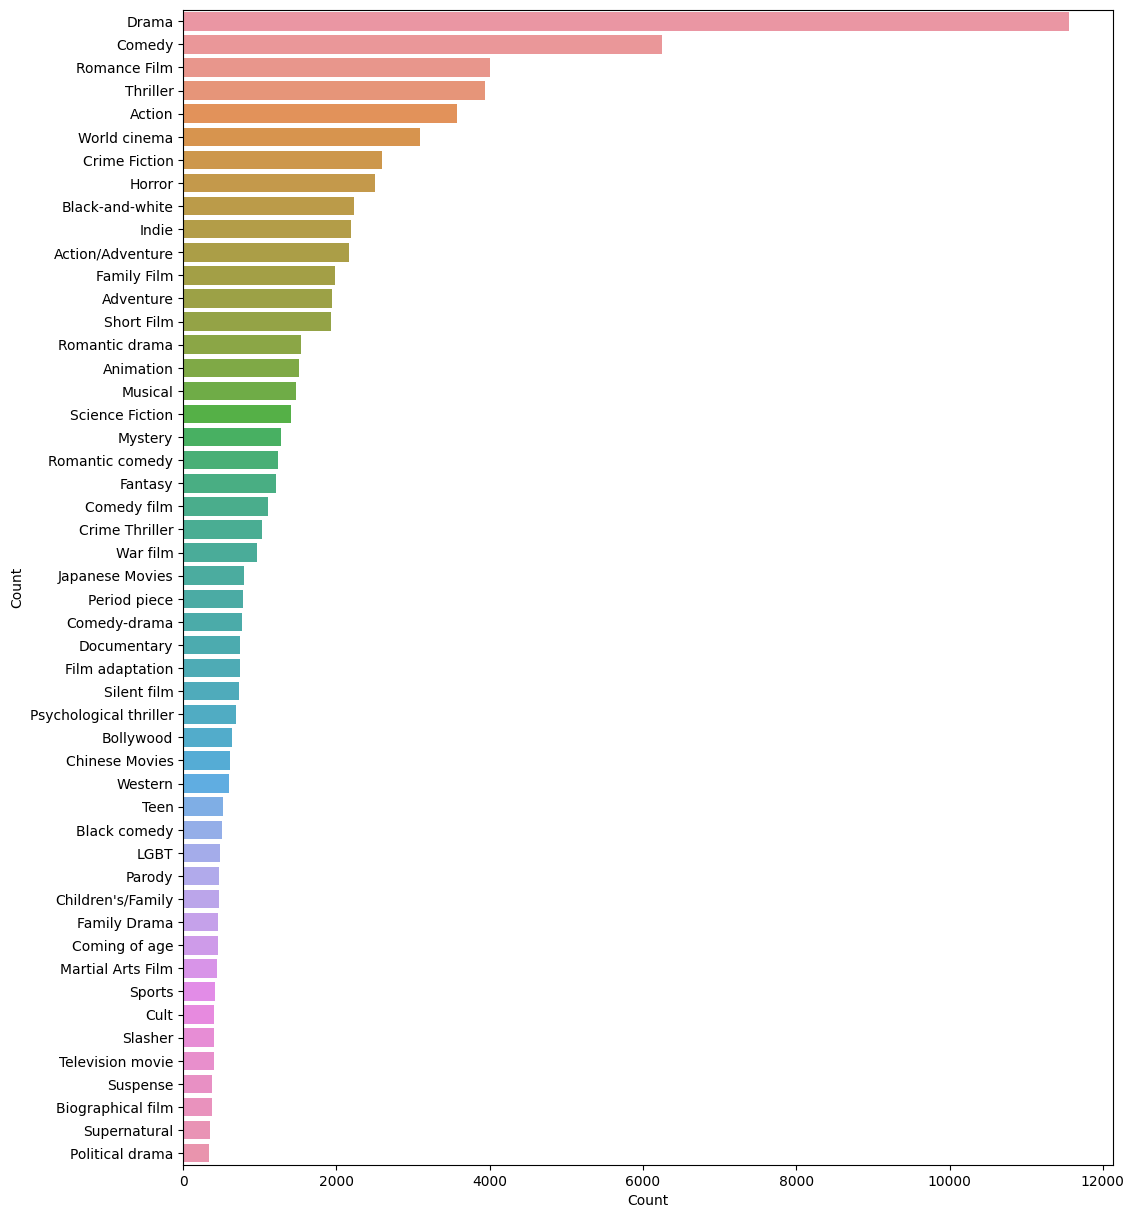

In [ ]:
g = all_genres_df.nlargest(columns="Count", n = 50)
plt.figure(figsize=(12,15))
ax = sns.barplot(data=g, x= "Count", y = "Genre")
ax.set(ylabel = 'Count')
plt.show()

In [ ]:
# function for text cleaning
def clean_text(text):
    # remove backslash-apostrophe
    text = re.sub("\'", "", text)
    # remove everything except alphabets
    text = re.sub("[^a-zA-Z]"," ",text)
    # remove whitespaces
    text = ' '.join(text.split())
    # convert text to lowercase
    text = text.lower()

    return text

In [ ]:
movies_new.loc[:, 'clean_plot'] = movies_new['plot'].apply(lambda x: clean_text(x))


<ipython-input-30-e27c6c47302d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_new.loc[:, 'clean_plot'] = movies_new['plot'].apply(lambda x: clean_text(x))


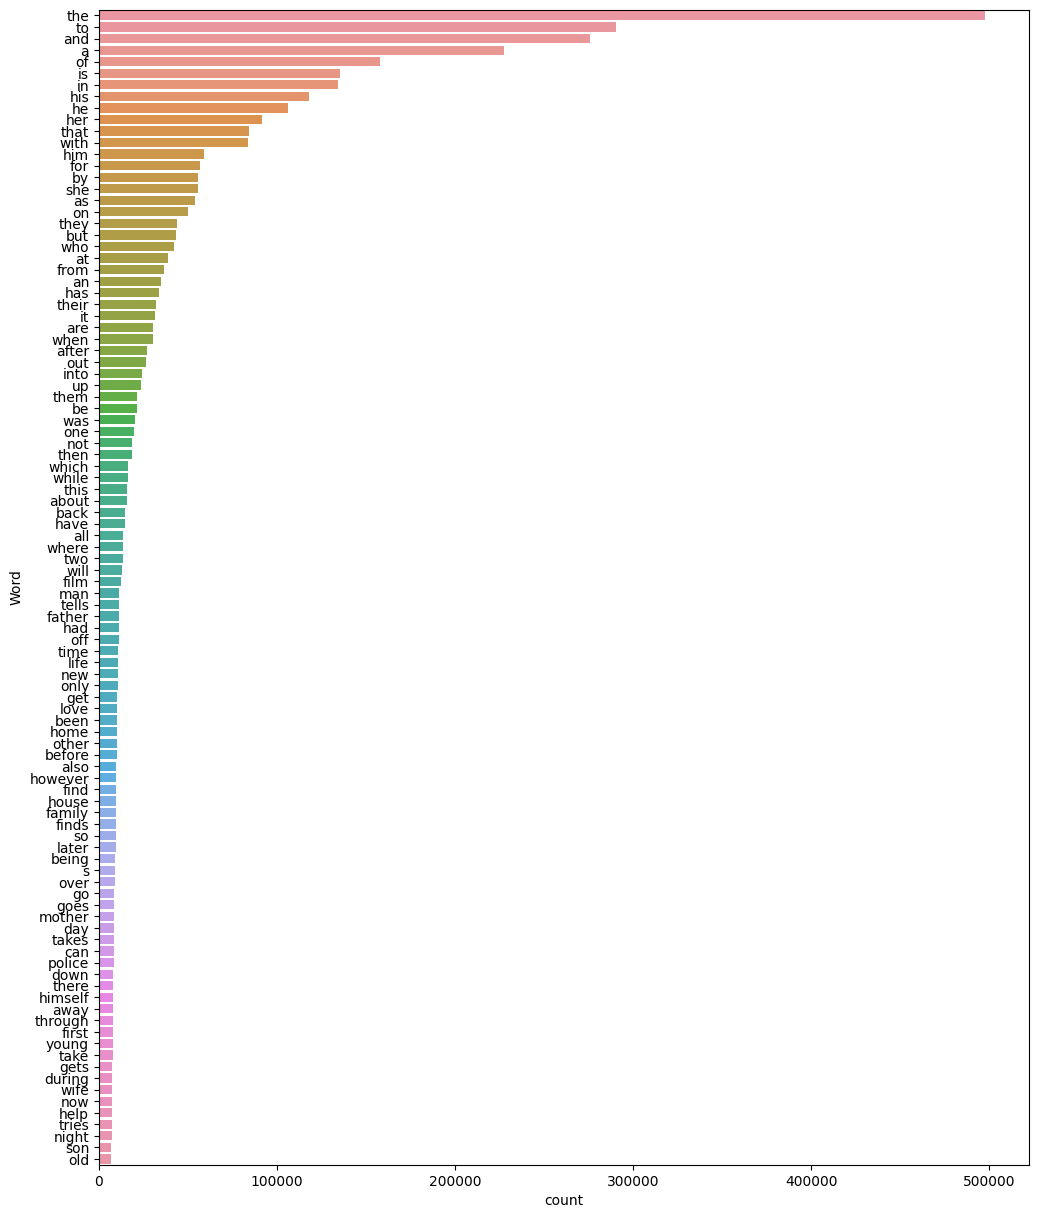

In [ ]:
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()
  fdist = nltk.FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms)

  # visualize words and frequencies
  plt.figure(figsize=(12,15))
  ax = sns.barplot(data=d, x= "count", y = "word")
  ax.set(ylabel = 'Word')
  plt.show()

# print 100 most frequent words
freq_words(movies_new['clean_plot'], 100)

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# function to remove stopwords
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

movies_new['clean_plot'] = movies_new['clean_plot'].apply(lambda x: remove_stopwords(x))

<ipython-input-33-5811fc4a49fe>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_new['clean_plot'] = movies_new['clean_plot'].apply(lambda x: remove_stopwords(x))


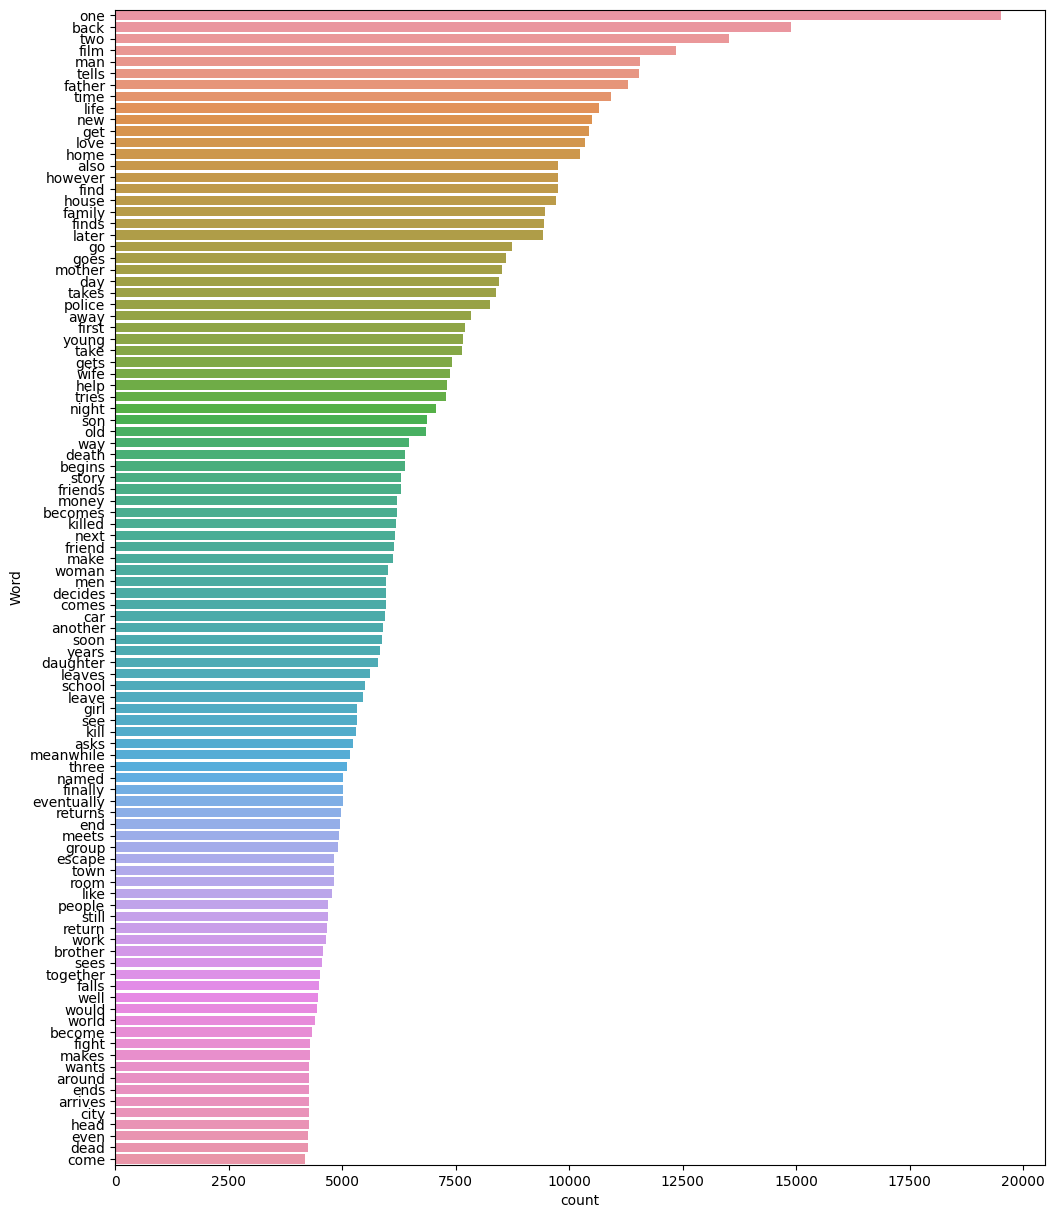

In [ ]:
freq_words(movies_new['clean_plot'], 100)

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(movies_new['genre_new'])

# transform target variable
y = multilabel_binarizer.transform(movies_new['genre_new'])

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000)

In [ ]:
# split dataset into training and validation set
xtrain, xval, ytrain, yval = train_test_split(movies_new['clean_plot'], y, test_size=0.2, random_state=9)

In [ ]:
# create TF-IDF features
xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain)
xval_tfidf = tfidf_vectorizer.transform(xval)

In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
# Binary Relevance
from sklearn.multiclass import OneVsRestClassifier


In [ ]:
# Performance metric
from sklearn.metrics import f1_score


In [ ]:
lr = LogisticRegression()
clf = OneVsRestClassifier(lr)

In [ ]:
# fit model on train data
clf.fit(xtrain_tfidf, ytrain)


/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 148 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 169 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 202 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 232 is present in all training examples.
  warnings.warn(


OneVsRestClassifier(estimator=LogisticRegression())

In [ ]:
# make predictions for validation set
y_pred = clf.predict(xval_tfidf)

In [ ]:
y_pred[3]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
multilabel_binarizer.inverse_transform(y_pred)[3]

('Musical',)

In [ ]:
# evaluate performance
f1_score(yval, y_pred, average="micro")

0.28322805777640353

In [ ]:
# predict probabilities
y_pred_prob = clf.predict_proba(xval_tfidf)

In [ ]:
t = 0.3 # threshold value
y_pred_new = (y_pred_prob >= t).astype(int)

In [ ]:
# evaluate performance
f1_score(yval, y_pred_new, average="micro")

0.41674274878853856

In [ ]:
def infer_tags(q):
    q = clean_text(q)
    q = remove_stopwords(q)
    q_vec = tfidf_vectorizer.transform([q])
    q_pred = clf.predict(q_vec)
    return multilabel_binarizer.inverse_transform(q_pred)

In [ ]:
for i in range(5):
  k = xval.sample(1).index[0]
  print("Movie: ", movies_new['movie_name'][k], "\nPredicted genre: ", infer_tags(xval[k])), print("Actual genre: ",movies_new['genre_new'][k], "\n")

Movie:  La très très grande entreprise 
Predicted genre:  [()]
Actual genre:  ['Drama'] 

Movie:  All the King's Men 
Predicted genre:  [('Action', 'Drama', 'War film')]
Actual genre:  ['Period piece', 'Action', 'Drama', 'Television movie'] 

Movie:  Take Me Home 
Predicted genre:  [('Drama',)]
Actual genre:  ['Romance Film', 'Comedy film'] 

Movie:  Kidco 
Predicted genre:  [('Drama',)]
Actual genre:  ['Comedy'] 

Movie:  Target for Tonight 
Predicted genre:  [()]
Actual genre:  ['History', 'Documentary', 'Drama', 'World History', 'War film'] 

